# Edge Detection in Microscopic Cells

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Read the image
from skimage import io 

In [20]:
# Read from skimage
# Reads with color
raw_img = io.imread("test_1.png");
print("shape of the image:", raw_img.shape)  ### width, height, and num_channels (e.g., RBG) of the image
print(f"there are {np.prod(raw_img.shape[:-1])} pixels in the image.") 
print("First 10 pixels of the image: " + str(raw_img[0][:10])); # (R,G,B, Transperency for each pixel)

# Image using CV
# cv doesn't use color, seems to maybe average or take the first value
img = cv.imread("test_3.png", 0);

# Guassian Filtering
dst = cv.GaussianBlur(img,(3,3),0)

# Sobel Derivative Filtering with Gaussian
sobelGaussx = cv.Sobel(src=dst, ddepth=cv.CV_16S, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobelGaussy = cv.Sobel(src=dst, ddepth=cv.CV_16S, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelGaussxy = cv.Sobel(src=dst, ddepth=cv.CV_16S, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Sobel Derivative Filtering without Gaussian
sobelx = cv.Sobel(src=img, ddepth=cv.CV_16S, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv.Sobel(src=img, ddepth=cv.CV_16S, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv.Sobel(src=img, ddepth=cv.CV_16S, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

print("Image shape: ",img.shape)
print("First 10 pixels of the Normal image: " + str(img[0][:10])); 
print("Kernel Size of Normal: ")
print("First 5 pixels of 1st row the Guassian image: " + str(img[0][:5])); 
print("First 5 pixels of 2nd row the Guassian image: " + str(img[1][:5])); 
print("First 5 pixels of 3rd row the Guassian image: " + str(img[2][:5])); 
print("First 5 pixels of 4th row the Guassian image: " + str(img[3][:5])); 
print("First 5 pixels of 5th row the Guassian image: " + str(img[4][:5])); 
print("Gaussian shape: ", dst.shape)
print("Kernel Size of Gaussian: ")
print("First 5 pixels of 1st row the Guassian image: " + str(dst[0][:5])); 
print("First 5 pixels of 2nd row the Guassian image: " + str(dst[1][:5])); 
print("First 5 pixels of 3rd row the Guassian image: " + str(dst[2][:5])); 
print("First 5 pixels of 4th row the Guassian image: " + str(dst[3][:5])); 
print("First 5 pixels of 5th row the Guassian image: " + str(dst[4][:5])); 

# Using Canny Edge Detection Filter
edges = cv.Canny(img, 100, 200);

shape of the image: (318, 458, 4)
there are 145644 pixels in the image.
First 10 pixels of the image: [[102 102 102 255]
 [102 102 102 255]
 [102 102 102 255]
 [ 98  98  98 255]
 [ 90  89  89 255]
 [ 90  89  90 255]
 [ 97  98  98 255]
 [102 102 102 255]
 [102 102 102 255]
 [ 97  98  98 255]]
Image shape:  (264, 272)
First 10 pixels of the Normal image: [255 255 255 255 255 255 255 255 255 255]
Kernel Size of Normal: 
First 5 pixels of 1st row the Guassian image: [255 255 255 255 255]
First 5 pixels of 2nd row the Guassian image: [255 255 255 255 255]
First 5 pixels of 3rd row the Guassian image: [255 255 255 255 255]
First 5 pixels of 4th row the Guassian image: [255 255 255 255 255]
First 5 pixels of 5th row the Guassian image: [255 255 255 255 255]
Gaussian shape:  (264, 272)
Kernel Size of Gaussian: 
First 5 pixels of 1st row the Guassian image: [255 255 255 255 255]
First 5 pixels of 2nd row the Guassian image: [255 255 255 255 255]
First 5 pixels of 3rd row the Guassian image: [25

(Text(0.5, 1.0, 'Sobel Imaging without Gaussing y'), ([], []), ([], []))

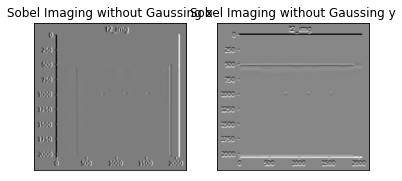

In [25]:
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title("Original Image"), plt.xticks([]),plt.yticks([])

# plt.subplot(122), plt.imshow(sobelGaussxy, cmap = 'gray')
# plt.title('Sobel Imaging xy'), plt.xticks([]), plt.yticks([])

# plt.subplot(122), plt.imshow(sobelGaussxy, cmap = 'gray')
# plt.title('Sobel Imaging Without Gauss xy'), plt.xticks([]), plt.yticks([])

# Note, for some reason, Sobel does better when we just look for the y-derivative...

# plt.subplot(121), plt.imshow(sobelGaussx, cmap = 'gray')
# plt.title('Sobel Imaging x'), plt.xticks([]), plt.yticks([])

# plt.subplot(122), plt.imshow(sobelGaussy, cmap = 'gray')
# plt.title('Sobel Imaging y'), plt.xticks([]), plt.yticks([])

plt.subplot(121), plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel Imaging without Gaussing x'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Imaging without Gaussing y'), plt.xticks([]), plt.yticks([])

# plt.subplot(122), plt.imshow(edges, cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

# plt.subplot(122), plt.imshow(dst, cmap = 'gray')
# plt.title('Guassian Filter'), plt.xticks([]), plt.yticks([])

In [15]:
plt.show();

In [195]:
# Quick Gaussian blur experiment
# Suppose a matrix that is all ones by 5 x 5, 2D array
# Guassian_Test = [
#     [1,1,1,1,1],
#     [1,1,1,1,1],
#     [1,1,1,1,1],
#     [1,1,50,1,1],
#     [1,1,1,1,1]
# ];

Gaussian_Test = [
    [50,1],
    [1,2]
];

# SD and Mean
arr = np.array(Gaussian_Test);
print("SD of matrix: ", str(arr.std()));
print("Mean of matrix: ", str(arr.mean()));

# Conversion to UMat
src = cv.UMat(np.array(Guassian_Test, dtype=np.uint8))

# Guassian Filtering
test = cv.GaussianBlur(src,(3,3),0)

# Output reading
output = test.get().astype('f');
print(type(output));
print(output);
# print("Gaussian shape: ", test.shape)
# print("Kernel Size of Gaussian: ")
# print("First 5 pixels of 1st row the Guassian image: " + str(test[0][:5])); 
# print("First 5 pixels of 2nd row the Guassian image: " + str(test[1][:5])); 
# print("First 5 pixels of 3rd row the Guassian image: " + str(test[2][:5])); 
# print("First 5 pixels of 4th row the Guassian image: " + str(test[3][:5])); 
# print("First 5 pixels of 5th row the Guassian image: " + str(test[4][:5])); 

SD of matrix:  21.07723890835799
Mean of matrix:  13.5
<class 'numpy.ndarray'>
[[14. 14.]
 [14. 14.]]


# USING HED (Holistically-Nested Edge Detection)

In [199]:
import cv2

# Image using CV
img = cv2.imread("test_1.png");

(H, W) = img.shape[:2]
blob = cv2.dnn.blobFromImage(img, scalefactor=1.0, size=(W, H), swapRB=False, crop=False)
net = cv2.dnn.readNetFromCaffe("./hed/deploy.prototxt", "./hed/hed_pretrained_bsds.caffemodel")
net.setInput(blob)
hed = net.forward()
hed = cv2.resize(hed[0, 0], (W, H))
hed = (255 * hed).astype("uint8")
cv2.imshow("Input", img)
cv2.imshow("HED", hed)
cv2.waitKey(0)

45

# Corner Detection Using Harris

In [ ]:
import numpy as np
import cv2 as cv
filename = "test_4.png"
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()